# Exercícios

### Para todos os desafios, insira legendas, rótulos dos eixos, título do gráfico.

### Resolva os 3 primeiros exercícios usando matplotlib e os 3 seguintes usando altair. O último, fica à seu critério

## 1) Utilizando o dataset Pokemon, crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Display figures inline in Jupyter notebook
#%matplotlib inline

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(10, 5)})

In [2]:
#carga do arquivo
poke = pd.read_csv('Pokemon.csv')
poke.columns = poke.columns.str.upper().str.replace('.', '')
poke['TYPE 2'].fillna(poke['TYPE 1'],inplace=True)
poke.head(11)

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP ATK,SP DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


In [5]:
# resposta 1
# definição da função

def hist_ds_atributo(ds,atributo):
    plt.axvline(ds.mean(), color='gray', linewidth=2)
    plt.hist(ds)
    plt.xlabel(atributo)
    plt.ylabel('Valor')
    plt.title('Histograma de ' + atributo)
    plt.show()

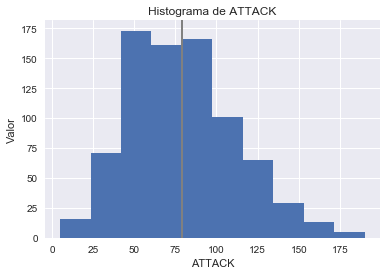

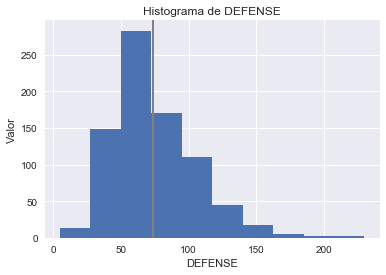

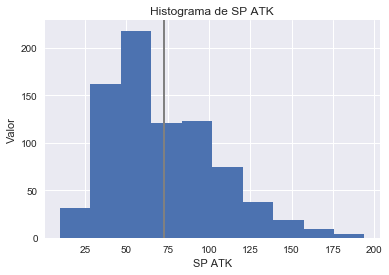

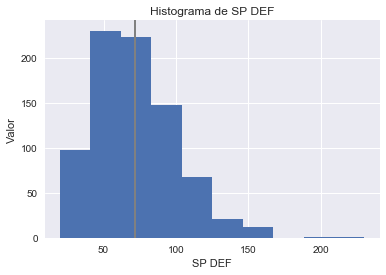

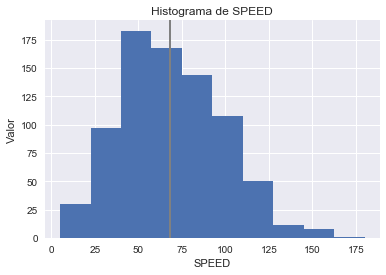

In [6]:
#resposta 1
atributo_list = ['ATTACK', 'DEFENSE', 'SP ATK', 'SP DEF', 'SPEED']
for atrib in atributo_list:
    hist_ds_atributo(poke[atrib], atrib)

## 2) Usando o dataset Pokemon, crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water. 

In [213]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='r', label='Fire')
cian_patch = mpatches.Patch(color='c', label='Water')

cor = lambda x : 'c' if (x['TYPE 1']=='Water' or x['TYPE 2']=='Water') else 'r'

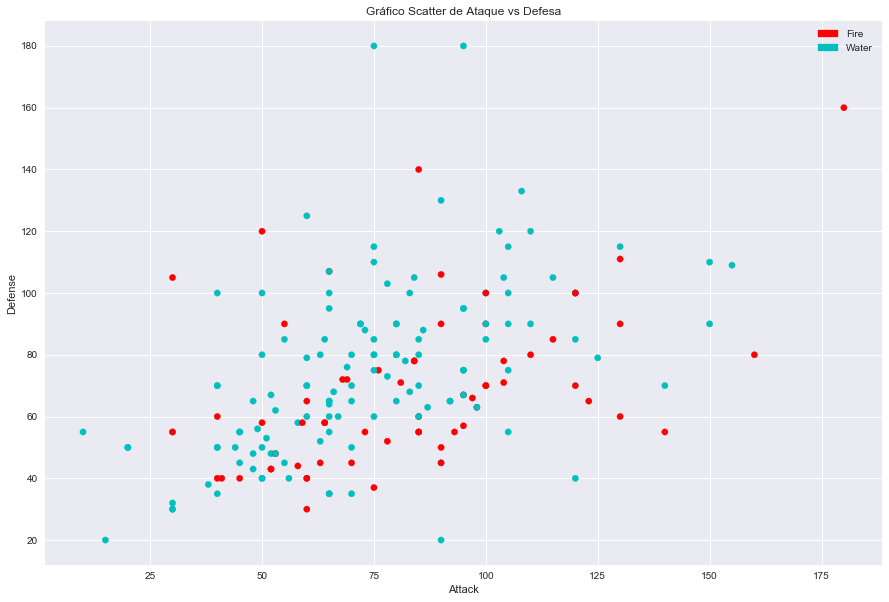

In [215]:
# resposta 2
ds = poke[poke['TYPE 1'].isin(['Fire','Water']) | poke['TYPE 2'].isin(['Fire','Water'])]
plt.scatter(ds.ATTACK, ds.DEFENSE, 40, ds.apply(cor, axis=1))
plt.title('Gráfico Scatter de Ataque vs Defesa')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(handles=[red_patch,cian_patch])
plt.show()

## 3) Usando o dataset Pokemons, crie um gráfico de linha para comparar a quantidade de pokemons de cada tipo ao longo das gerações

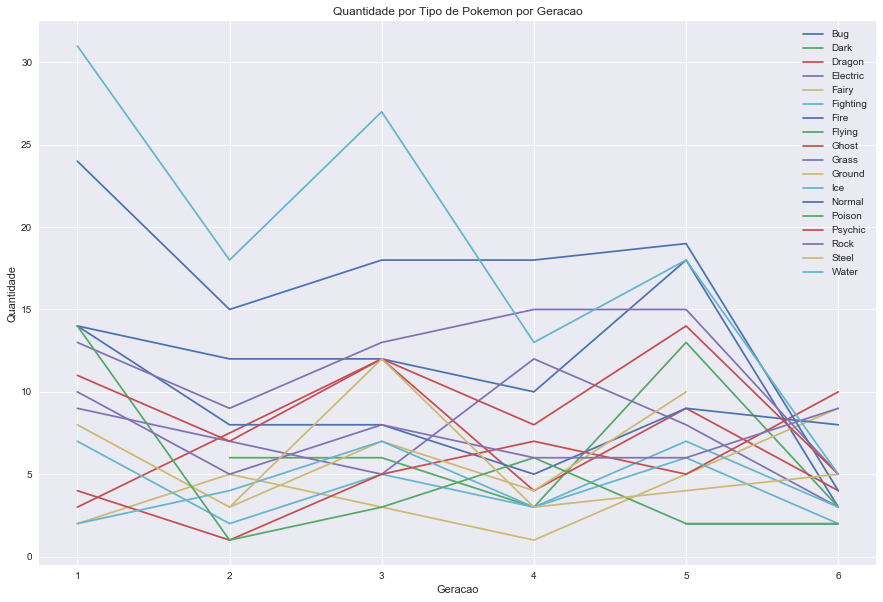

In [80]:
# resposta 3
ds = poke.groupby(['GENERATION','TYPE 1'], as_index=False).count()
poke_types = ds['TYPE 1'].unique()
poke_types.sort()

plt.figure(figsize=(15,10))
plt.title('Quantidade por Tipo de Pokemon por Geracao')
plt.xlabel('Geracao')
plt.ylabel('Quantidade')

for pkt in poke_types:
    ds_line = ds[['GENERATION','#']][ds['TYPE 1'] == pkt]  
    plt.plot(ds_line['GENERATION'], ds_line['#'], label=pkt)

plt.legend()

## 4) Utilizando o dataset airports (var = data.airports()):
    -> Faça um rank bar dos 5 primeiros estados dos EUA com maior número de aeroportos


In [13]:
# Importações
import altair as alt

In [14]:
# resposta 4
# pegar do Vegas
from vega_datasets import data
aeroportos = data.airports()
aeroportos.groupby(['country','state']).size().unstack()

state,AK,AL,AR,AS,AZ,CA,CO,CQ,CT,DC,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
country,,,,,,,,,,,,,,,,,,,,,
USA,263,73,74,3,59,205,49,4,15,1,...,70,209,35,47,5,13,65,84,24,32


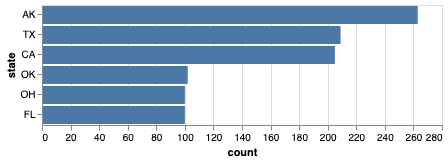

In [15]:
# Rank dos 5 primeiros estados dos EUA com maior número de aeroportos
alt.Chart(aeroportos).transform_aggregate(
    count='count()',
    groupby=['country','state']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter('datum.rank <= 5').mark_bar().encode(
        y=alt.Y('state:N', sort=alt.EncodingSortField(field='count', order='descending')
    ),
    x='count:Q',
)

## 5) Utilizando o conjunto de dados íris (var = data.íris()):
    -> Crie dois gráficos scatter, chart1 e chart2. Para o chart1, x=petalLenght, y=petalWidth. Para o chart2, x = sepalLenght, y=sepalWidth.

    -> Componha esses gráficos numa única apresentação. Para isso, faça chart1 | chart2


In [116]:
# Importações
from altair import Chart, X, Y, Axis, EncodingSortField
from vega_datasets import data
var = data.iris()
var.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [124]:
# resposta 5
def chart_characteristic(part):
    x = part+'Length'
    x_title = part+' lenght'
    y = part+'Width'
    y_title = part+' width'
    p_title = part + ' lenght vs width'
    return (Chart(var).mark_point().properties(title=p_title).encode(  
        X(x, axis=Axis(title=x_title)),
        Y(y, axis=Axis(title=y_title)))
    )

def present_chart_composition(part1, part2):
    return chart_characteristic(part1) | chart_characteristic(part2)

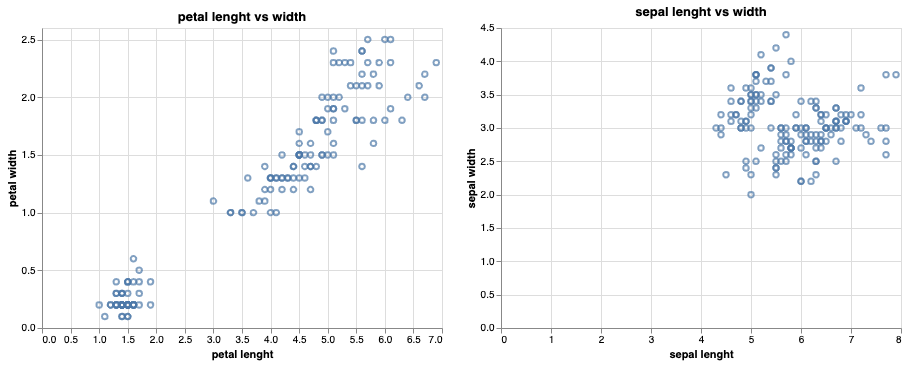

In [115]:
present_chart_composition('petal','sepal')

## 6) Usando o dataset Pokemon, crie um rank bar que mostre o rank para Type 1

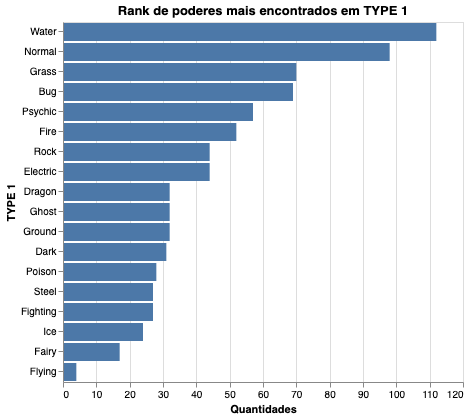

In [123]:
# resposta 6
Chart(poke).transform_aggregate(
    count='count()',
    groupby=['TYPE 1']
).mark_bar().properties(title='Rank de poderes mais encontrados em TYPE 1').encode(
        x=X('count:Q', axis=Axis(title='Quantidades')),
    y=Y('TYPE 1:N', sort=EncodingSortField(field='count', order='descending'))
)

## 7) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a proporção de pokemons Legendários e aqueles que não são legendários. Use stacked bar. 

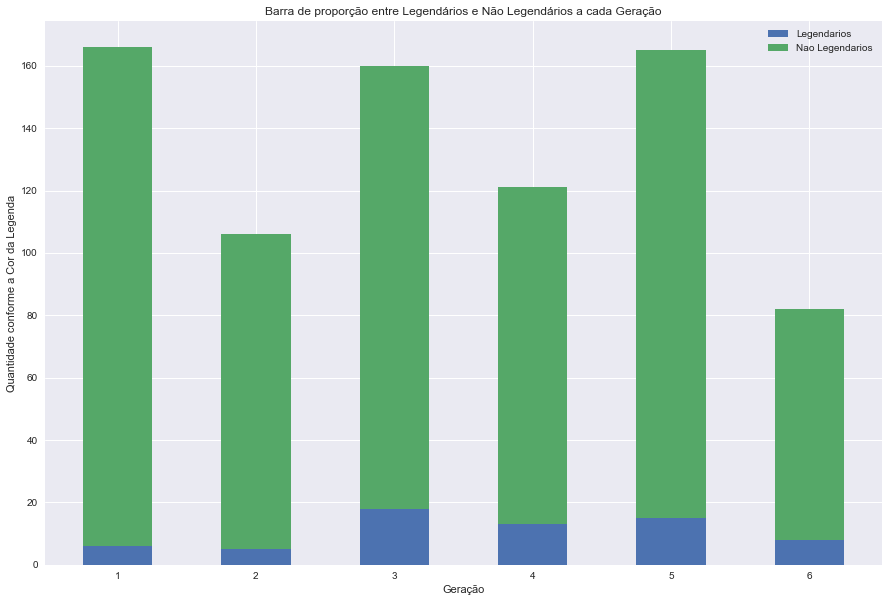

In [121]:
# resposta 7
width = 0.5
legendarios = poke[poke['LEGENDARY']==True].groupby(['GENERATION']).size()
nao_legendarios = poke[poke['LEGENDARY']==False].groupby(['GENERATION']).size()

height_cumulative = legendarios.values
l = plt.bar(legendarios.index, nao_legendarios, width)
nl = plt.bar(legendarios.index, nao_legendarios, width, bottom=height_cumulative)

plt.legend((l[0], nl[0]), ('Legendarios', 'Nao Legendarios'), loc='upper right')
plt.xlabel('Geração')
plt.ylabel('Quantidade conforme a Cor da Legenda')
plt.title('Barra de proporção entre Legendários e Não Legendários a cada Geração')
plt.show()